<a href="https://colab.research.google.com/github/hhindley/phd/blob/main/colab_notebooks/normalising_fig1_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

IN_PATH = '/content/drive/MyDrive/data/fig1_data'

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


Normalising data

In [ ]:
test = pd.read_csv('/content/drive/MyDrive/data/fig1_data/test1.csv')
test

,exp,rep,WT_gor,gor,WT_mazF,mazF,WT_ybaK,ybaK,WT_yobF,yobF
0,1,1,123.57,342.15,214.72,631.20,123.57,232.39,123.57,203.57
1,1,2,142.98,327.44,211.51,631.14,142.98,223.39,142.98,217.62
2,1,3,141.27,336.34,224.01,549.82,141.27,241.55,141.27,207.22
3,2,1,108.81,252.46,126.48,398.15,108.81,185.97,108.81,235.33
4,2,2,104.68,239.58,150.06,376.91,104.68,181.31,104.68,234.06
5,2,3,94.80,231.54,138.68,370.20,94.80,168.33,94.80,239.60
6,3,1,146.58,304.38,108.81,171.01,146.58,224.83,146.58,143.82
7,3,2,114.76,339.16,104.68,177.37,114.76,188.72,114.76,172.95
8,3,3,130.83,335.35,94.80,147.97,130.83,202.14,130.83,175.38
9,4,1,159.51,373.84,313.89,662.28,313.89,431.12,159.51,158.95


In [ ]:
test.dtypes

exp          int64
rep          int64
WT_gor     float64
gor        float64
WT_mazF    float64
mazF       float64
WT_ybaK    float64
ybaK       float64
WT_yobF    float64
yobF       float64
dtype: object

Calculate means/std for each experiment

In [ ]:
means = [[(test.WT_gor.loc[test.exp == vr].mean()) for vr in range(1,6)], [(test.WT_mazF.loc[test.exp == vr].mean()) for vr in range(1,10)], [(test.WT_ybaK.loc[test.exp == vr].mean()) for vr in range(1,10)], [(test.WT_yobF.loc[test.exp == vr].mean()) for vr in range(1,8)]]

In [ ]:
wt_means_df = pd.DataFrame({'exp': [1,2,3,4,5,6,7,8,9], 'gor':pd.Series(means[0]), 'mazF':pd.Series(means[1]), 'ybaK':pd.Series(means[2]), 'yobF':pd.Series(means[3])})

In [ ]:
means_mut = [[(test.gor.loc[test.exp == vr].mean()) for vr in range(1,6)], [(test.mazF.loc[test.exp == vr].mean()) for vr in range(1,10)], [(test.ybaK.loc[test.exp == vr].mean()) for vr in range(1,10)], [(test.yobF.loc[test.exp == vr].mean()) for vr in range(1,8)]]
mut_means_df = pd.DataFrame({'exp': [1,2,3,4,5,6,7,8,9], 'gor':pd.Series(means_mut[0]), 'mazF':pd.Series(means_mut[1]), 'ybaK':pd.Series(means_mut[2]), 'yobF':pd.Series(means_mut[3])})

In [ ]:
std = [[(test.WT_gor.loc[test.exp == vr].std()) for vr in range(1,6)], [(test.WT_mazF.loc[test.exp == vr].std()) for vr in range(1,10)], [(test.WT_ybaK.loc[test.exp == vr].std()) for vr in range(1,10)], [(test.WT_yobF.loc[test.exp == vr].std()) for vr in range(1,8)]]

In [ ]:
wt_std_df = pd.DataFrame({'exp': [1,2,3,4,5,6,7,8,9], 'gor':pd.Series(std[0]), 'mazF':pd.Series(std[1]), 'ybaK':pd.Series(std[2]), 'yobF':pd.Series(std[3])})

In [ ]:
std_mut = [[(test.gor.loc[test.exp == vr].std()) for vr in range(1,6)], [(test.mazF.loc[test.exp == vr].std()) for vr in range(1,10)], [(test.ybaK.loc[test.exp == vr].std()) for vr in range(1,10)], [(test.yobF.loc[test.exp == vr].std()) for vr in range(1,8)]]
mut_std_df = pd.DataFrame({'exp': [1,2,3,4,5,6,7,8,9], 'gor':pd.Series(std_mut[0]), 'mazF':pd.Series(std_mut[1]), 'ybaK':pd.Series(std_mut[2]), 'yobF':pd.Series(std_mut[3])})

Normalise data

In [ ]:
gor_norm = []
for i in range(0,5):
    gor_norm.extend(test.gor.loc[test.exp == i+1].apply(lambda x : (100/means[0][i])*x).values.tolist())

mazF_norm = []
for i in range(0,9):
    mazF_norm.extend(test.mazF.loc[test.exp == i+1].apply(lambda x : (100/means[1][i])*x).values.tolist())

ybaK_norm = []
for i in range(0,9):
    ybaK_norm.extend(test.ybaK.loc[test.exp == i+1].apply(lambda x : (100/means[2][i])*x).values.tolist())

yobF_norm = []
for i in range(0,7):
    yobF_norm.extend(test.yobF.loc[test.exp == i+1].apply(lambda x : (100/means[3][i])*x).values.tolist())

In [ ]:
norm_data = pd.DataFrame({'norm_gor':pd.Series(gor_norm), 'norm_mazF':pd.Series(mazF_norm), 'norm_ybaK':pd.Series(ybaK_norm), 'norm_yobF':pd.Series(yobF_norm)})

In [ ]:
full_data = pd.concat([test, norm_data], axis=1, join='inner')

In [ ]:
full_data

,exp,rep,WT_gor,gor,WT_mazF,mazF,WT_ybaK,ybaK,WT_yobF,yobF,norm_gor,norm_mazF,norm_ybaK,norm_yobF
0,1,1,123.57,342.15,214.72,631.20,123.57,232.39,123.57,203.57,251.691923,291.215551,170.950419,149.749890
1,1,2,142.98,327.44,211.51,631.14,142.98,223.39,142.98,217.62,240.870972,291.187869,164.329851,160.085332
2,1,3,141.27,336.34,224.01,549.82,141.27,241.55,141.27,207.22,247.417979,253.669414,177.688686,152.434898
3,2,1,108.81,252.46,126.48,398.15,108.81,185.97,108.81,235.33,245.671284,287.666779,180.969217,229.001914
4,2,2,104.68,239.58,150.06,376.91,104.68,181.31,104.68,234.06,233.137630,272.320697,176.434526,227.766064
5,2,3,94.80,231.54,138.68,370.20,94.80,168.33,94.80,239.60,225.313828,267.472665,163.803562,233.157092
6,3,1,146.58,304.38,108.81,171.01,146.58,224.83,146.58,143.82,232.842900,166.411496,171.989188,110.018614
7,3,2,114.76,339.16,104.68,177.37,114.76,188.72,114.76,172.95,259.448708,172.600474,144.365964,132.302318
8,3,3,130.83,335.35,94.80,147.97,130.83,202.14,130.83,175.38,256.534156,143.991047,154.631920,134.161206
9,4,1,159.51,373.84,313.89,662.28,313.89,431.12,159.51,158.95,283.878806,207.165349,134.857048,120.700129


Std/means for normalised data per experiment


In [ ]:
std_full = [full_data.norm_gor.std(), full_data.norm_mazF.std(), full_data.norm_ybaK.std(), full_data.norm_yobF.std()]

In [ ]:
print(std_full)

[28.011790095158002, 61.48401183513895, 44.62121181980824, 36.79423832326465]


In [ ]:
# full_data.to_csv('/content/drive/MyDrive/data/fig1_fulldata.csv', index=False)

In [ ]:
norm_means = [[(full_data.norm_gor.loc[full_data.exp == vr].mean()) for vr in range(1,6)], [(full_data.norm_mazF.loc[full_data.exp == vr].mean()) for vr in range(1,10)], [(full_data.norm_ybaK.loc[full_data.exp == vr].mean()) for vr in range(1,10)], [(full_data.norm_yobF.loc[full_data.exp == vr].mean()) for vr in range(1,8)]]

In [ ]:
norm_means_df = pd.DataFrame({'exp': [1,2,3,4,5,6,7,8,9], 'gor':pd.Series(norm_means[0]), 'mazF':pd.Series(norm_means[1]), 'ybaK':pd.Series(norm_means[2]), 'yobF':pd.Series(norm_means[3])})

In [ ]:
norm_means_df

,exp,gor,mazF,ybaK,yobF
0,1,246.660291,278.690945,170.989652,154.090040
1,2,234.707581,275.820047,173.735768,229.975024
2,3,249.608588,161.001006,156.995691,125.494046
3,4,261.568836,210.128668,137.981982,131.589339
4,5,190.024901,143.375837,88.423024,153.591374
5,6,NaN,331.205404,253.689638,203.761081
6,7,NaN,264.252733,191.355905,161.408534
7,8,NaN,252.772829,210.942868,NaN
8,9,NaN,174.739906,166.913859,NaN


In [ ]:
norm_std = [[(full_data.norm_gor.loc[full_data.exp == vr].std()) for vr in range(1,6)], [(full_data.norm_mazF.loc[full_data.exp == vr].std()) for vr in range(1,10)], [(full_data.norm_ybaK.loc[full_data.exp == vr].std()) for vr in range(1,10)], [(full_data.norm_yobF.loc[full_data.exp == vr].std()) for vr in range(1,8)]]

In [ ]:
norm_std_df = pd.DataFrame({'exp': [1,2,3,4,5,6,7,8,9], 'gor':pd.Series(norm_std[0]), 'mazF':pd.Series(norm_std[1]), 'ybaK':pd.Series(norm_std[2]), 'yobF':pd.Series(norm_std[3])})

In [ ]:
norm_std_df

,exp,gor,mazF,ybaK,yobF
0,1,5.450120,21.669285,6.679504,5.362832
1,2,10.269131,10.542042,8.895359,2.824182
2,3,14.592460,15.052570,13.962492,13.434307
3,4,23.052795,7.195416,2.814834,16.054274
4,5,3.619809,6.687621,3.229724,5.643807
5,6,NaN,5.830370,1.282116,6.128330
6,7,NaN,3.027433,5.346342,2.020830
7,8,NaN,8.604119,8.377496,NaN
8,9,NaN,5.154124,2.260189,NaN


In [ ]:
tot_foldch = ({'gor':(norm_means_df.gor.mean()/100), 'mazF':(norm_means_df.mazF.mean()/100), 'ybaK':(norm_means_df.ybaK.mean()/100), 'yobF':(norm_means_df.yobF.mean()/100)})

In [ ]:
norm_means_df.loc[9] = ['means', norm_means_df.gor.mean(), norm_means_df.mazF.mean(), norm_means_df.ybaK.mean(), norm_means_df.yobF.mean()] 

In [ ]:
norm_means_df.loc[10] = ['fold change', list(tot_foldch.values())[0], list(tot_foldch.values())[1], list(tot_foldch.values())[2], list(tot_foldch.values())[3]] 

In [ ]:
tot = pd.DataFrame({'mutant':['gor', 'mazF', 'ybaK', 'yobF'], 'mean': (norm_means_df.gor.mean(), norm_means_df.mazF.mean(), norm_means_df.ybaK.mean(), norm_means_df.yobF.mean()),  'mean_std': (norm_means_df.gor.std(), norm_means_df.mazF.std(), norm_means_df.ybaK.std(), norm_means_df.yobF.std()), 'fold_change':(norm_means_df.gor.mean()/100, norm_means_df.mazF.mean()/100, norm_means_df.ybaK.mean()/100, norm_means_df.yobF.mean()/100), 'fold_change_std':(norm_means_df.gor.std()/100, norm_means_df.mazF.std()/100, norm_means_df.ybaK.std()/100, norm_means_df.yobF.std()/100)})

In [ ]:
tot

,mutant,mean,mean_std,fold_change,fold_change_std
0,gor,203.064197,91.341961,2.030642,0.913420
1,mazF,211.523168,89.557039,2.115232,0.895570
2,ybaK,156.826204,65.896376,1.568262,0.658964
3,yobF,147.474200,63.816427,1.474742,0.638164


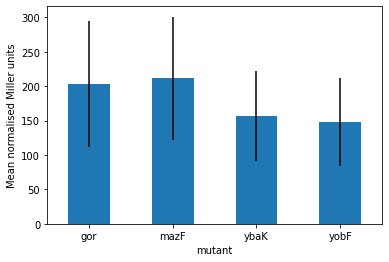

In [ ]:
tot.drop(['fold_change', 'fold_change_std'], axis=1).plot(kind='bar', x='mutant', ylabel='Mean normalised Miller units', legend=False, rot=0, yerr='mean_std')

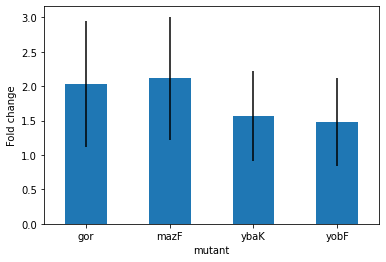

In [ ]:
tot.drop(['mean', 'mean_std'], axis=1).plot(kind='bar', x='mutant', ylabel='Fold change', legend=False, rot=0, yerr='fold_change_std')

In [ ]:
# norm_means_df.to_csv('/content/drive/MyDrive/data/fig1_fold_change.csv', index=False)

Text(0.5, 1.0, 'WT means for each experiment')

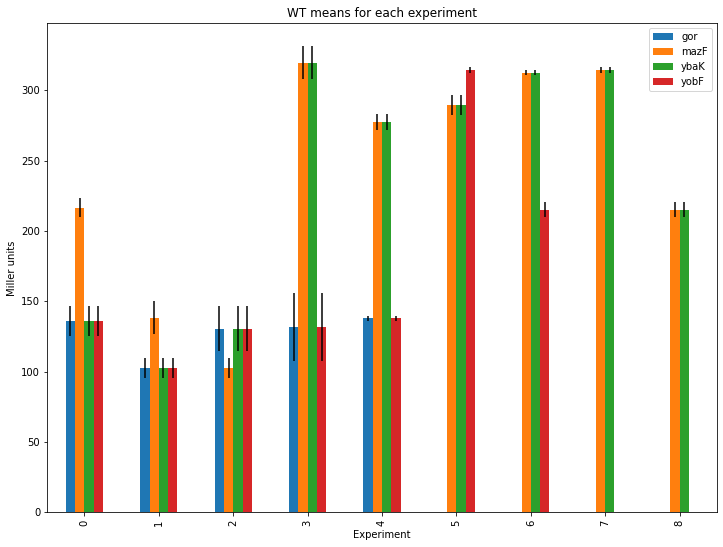

In [ ]:
p1 = wt_means_df.drop(['exp'], axis=1).plot(kind='bar', yerr=wt_std_df.drop(['exp'], axis=1), figsize=(12,9))
p1.set_xlabel('Experiment')
p1.set_ylabel('Miller units')
p1.set_title('WT means for each experiment')

Text(0.5, 1.0, 'Non-normalised mutant means for each experiment')

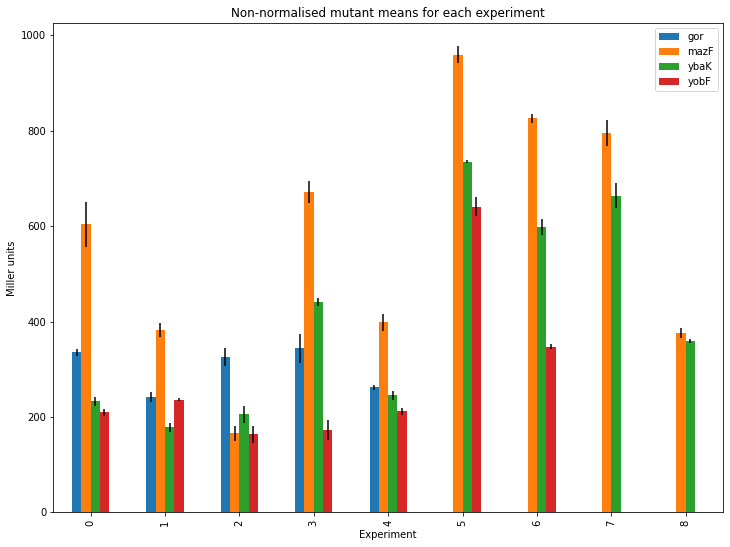

In [ ]:
p2 = mut_means_df.drop(['exp'], axis=1).plot(kind='bar', yerr=mut_std_df.drop(['exp'], axis=1), figsize=(12,9))
p2.set_xlabel('Experiment')
p2.set_ylabel('Miller units')
p2.set_title('Non-normalised mutant means for each experiment')

Text(0.5, 1.0, 'Normalised mutant means for each experiment')

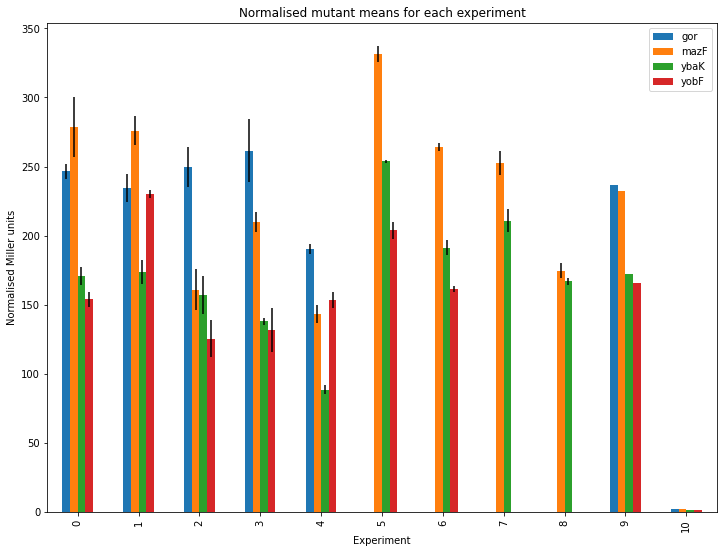

In [ ]:
p = norm_means_df.drop(['exp'], axis=1).plot(kind='bar', yerr=norm_std_df.drop(['exp'], axis=1), figsize=(12,9))
p.set_xlabel('Experiment')
p.set_ylabel('Normalised Miller units')
p.set_title('Normalised mutant means for each experiment')

Full dataset (not per experiment) 

Text(0, 0.5, 'WT Miller units')

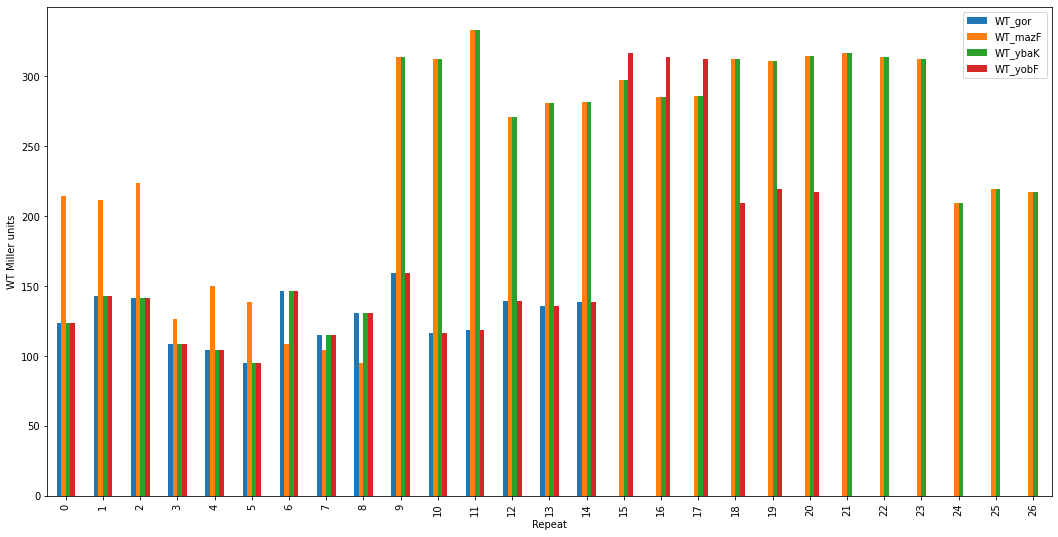

In [ ]:
p5 = full_data.drop(['exp', 'rep', 'norm_gor', 'norm_mazF', 'norm_ybaK', 'norm_yobF', 'gor', 'mazF', 'ybaK', 'yobF'], axis=1).plot(kind='bar',  figsize=(18,9))
p5.set_xlabel('Repeat')
p5.set_ylabel('WT Miller units')

Text(0, 0.5, 'Raw Miller units')

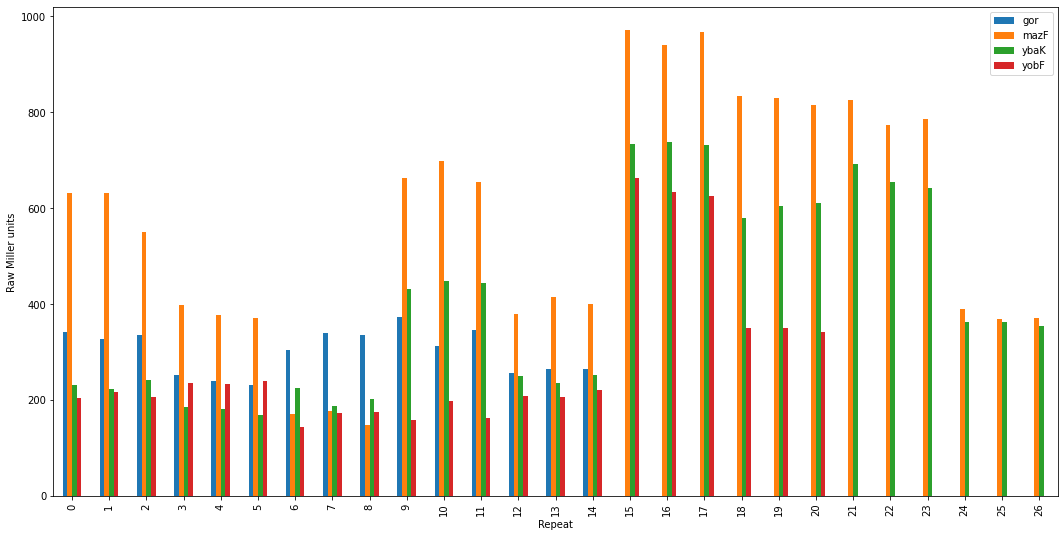

In [ ]:
p3 = full_data.drop(['exp', 'rep', 'WT_gor', 'WT_mazF', 'WT_ybaK', 'WT_yobF', 'norm_gor', 'norm_mazF', 'norm_ybaK', 'norm_yobF'], axis=1).plot(kind='bar',  figsize=(18,9))
p3.set_xlabel('Repeat')
p3.set_ylabel('Raw Miller units')

Text(0, 0.5, 'Normalised Miller units')

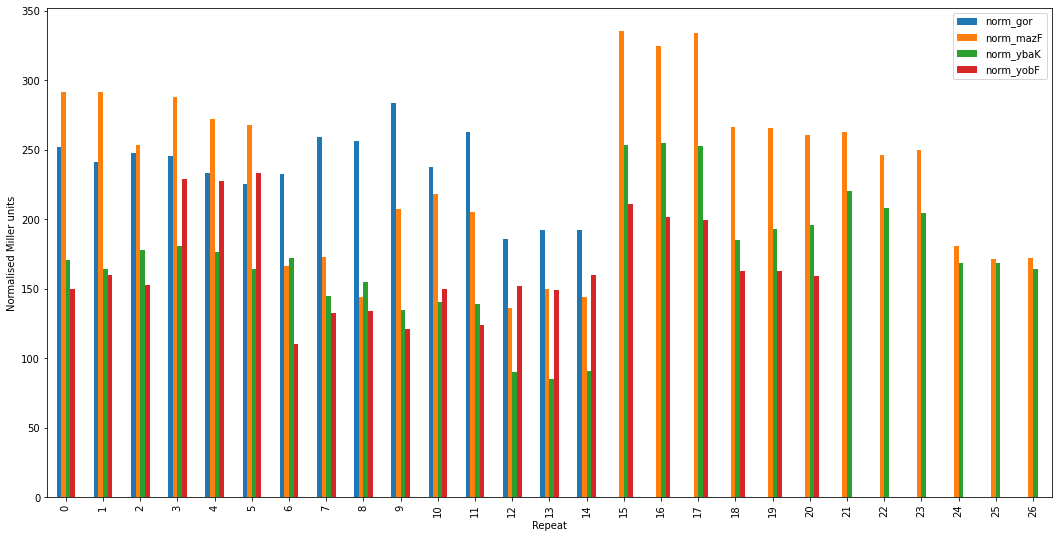

In [ ]:
p4 = full_data.drop(['exp', 'rep', 'WT_gor', 'WT_mazF', 'WT_ybaK', 'WT_yobF', 'gor', 'mazF', 'ybaK', 'yobF'], axis=1).plot(kind='bar',  figsize=(18,9))
p4.set_xlabel('Repeat')
p4.set_ylabel('Normalised Miller units')

In [ ]:
total_mean_std = pd.DataFrame({'mutant':['gor', 'mazF', 'ybaK', 'yobF'], 'means': [full_data.norm_gor.mean(), full_data.norm_mazF.mean(), full_data.norm_ybaK.mean(), full_data.norm_yobF.mean()], 'stds': [full_data.norm_gor.std(), full_data.norm_mazF.std(), full_data.norm_ybaK.std(), full_data.norm_yobF.std()]})

In [ ]:
total_mean_std

,mutant,means,stds
0,gor,236.514039,28.011790
1,mazF,232.443042,61.484012
2,ybaK,172.336488,44.621212
3,yobF,165.701348,36.794238


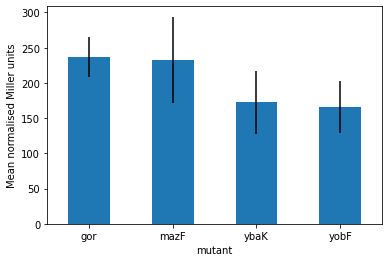

In [ ]:
total_mean_std.plot(kind='bar', x='mutant', ylabel='Mean normalised Miller units', legend=False, rot=0, yerr='stds')

In [ ]:
total_fold_change = pd.DataFrame({'mutant':['gor', 'mazF', 'ybaK', 'yobF'], 'fold change': pd.Series(total_mean_std.means/100), 'stds': pd.Series(total_mean_std.stds/100)})

In [ ]:
total_fold_change

,mutant,fold change,stds
0,gor,2.365140,0.280118
1,mazF,2.324430,0.614840
2,ybaK,1.723365,0.446212
3,yobF,1.657013,0.367942
